In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load csv file and display head

In [3]:
df = pd.read_csv('Independent_Medical_Review__IMR__Determinations__Trend.csv')

In [4]:
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [5]:
#display three random rows
df.sample(n=3)

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
7131,EI12-13766,2012,Cancer,Breast Cancer,Pharmacy/Prescription Drugs,Clinical Trial,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Female,A 64-year-old female enrollee has requested co...
763,EI16-21990,2016,OB-Gyn/ Pregnancy,Other,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,31-40,Female,Nature of Statutory Criteria/Case Summary: An ...
10662,MN09-10207,2009,Orthopedic/ Musculoskeletal,Osteoarthritis,Pharmacy/Prescription Drugs,Sedatives/ Hypnotics,Overturned Decision of Health Plan,Medical Necessity,65+,Female,A 65-year-old female enrollee has requested Lu...


In [6]:
df.shape

(19245, 11)

# Show all columns in dataframe

In [7]:
df.columns.values

array(['Reference ID', 'Report Year', 'Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender', 'Findings'], dtype=object)

# Checking missing values in dataframe

In [9]:
total_count = len(df)

In [12]:
missing_count = df.isnull().sum().reset_index(name='count')
missing_count

,index,count
0,Reference ID,0
1,Report Year,0
2,Diagnosis Category,59
3,Diagnosis Sub Category,1904
4,Treatment Category,450
5,Treatment Sub Category,1268
6,Determination,0
7,Type,0
8,Age Range,1210
9,Patient Gender,1210


In [13]:
missing_count['percent']= missing_count['count']/total_count *100
missing_count.columns = ['column_name','missing_count','percentage'] 
missing_count

,column_name,missing_count,percentage
0,Reference ID,0,0.000000
1,Report Year,0,0.000000
2,Diagnosis Category,59,0.306573
3,Diagnosis Sub Category,1904,9.893479
4,Treatment Category,450,2.338270
5,Treatment Sub Category,1268,6.588724
6,Determination,0,0.000000
7,Type,0,0.000000
8,Age Range,1210,6.287347
9,Patient Gender,1210,6.287347


<AxesSubplot:>

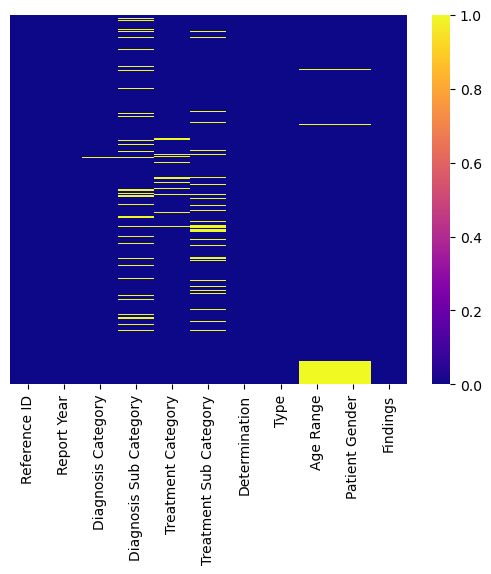

In [22]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=True,cmap = 'plasma',yticklabels = False)

In [23]:
null_df = missing_count[['column_name','percentage']]

In [24]:
null_df

,column_name,percentage
0,Reference ID,0.000000
1,Report Year,0.000000
2,Diagnosis Category,0.306573
3,Diagnosis Sub Category,9.893479
4,Treatment Category,2.338270
5,Treatment Sub Category,6.588724
6,Determination,0.000000
7,Type,0.000000
8,Age Range,6.287347
9,Patient Gender,6.287347


In [25]:
null_df.columns = ['column_name','null_value_%']

In [26]:
fig = plt.figure(figsize=(10,3))

<Figure size 1000x300 with 0 Axes>

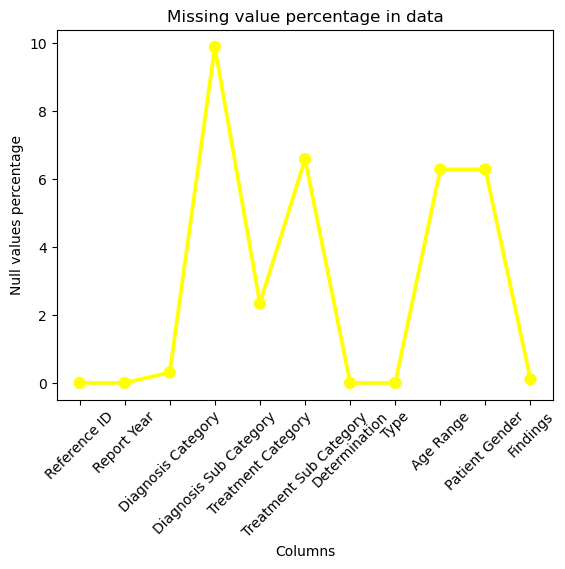

In [27]:
ax = sns.pointplot(x='column_name',y='null_value_%',data = null_df,color='yellow')
plt.xticks(rotation=45,fontsize=10)
plt.title("Missing value percentage in data")
plt.ylabel("Null values percentage")
plt.xlabel('Columns')
plt.show()

In [60]:
#checking data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          19242 non-null  object
 10  Findings                19225 non-null  object
 11  Extracted Gender        19242 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


# finding age range and gender same missing percentage

In [190]:
missing_year_gender = np.sort(df[df['Patient Gender'].isnull()]['Report Year'].unique())

In [192]:
missing_year_age = np.sort(df[df['Age Range'].isnull()]['Report Year'].unique())
missing_year_age

array([2001, 2002, 2003], dtype=int64)

### Age and gender column contains missing values for same year so will try to find out the values from fiding column

In [56]:
def find_gender(patient_info):
    gender = None
    if patient_info['Patient Gender'] in ['Male','Female']:
        gender = patient_info['Patient Gender']
    elif str(patient_info['Patient Gender']).lower() == 'nan' or str(patient_info['Patient Gender']).lower() =='None':
        findings_first_20_words = patient_info['Findings'].split(' ')[:20]
        # print(findings_first_20_words)
        for word in findings_first_20_words:
            if (re.search(r'\b(?:his|male|man)\b', word)):
                gender = 'Male'
            elif (re.search(r'\b(?:her|female|woman)\b', word)):
                gender = 'Female'
    
    return gender

In [58]:
df['Extracted Gender'] = df.apply(find_gender, axis=1)
df['Patient Gender'] = df.apply(find_gender, axis=1)
df.isnull().sum().reset_index(name='count')

,index,count
0,Reference ID,0
1,Report Year,0
2,Diagnosis Category,59
3,Diagnosis Sub Category,1904
4,Treatment Category,450
5,Treatment Sub Category,1268
6,Determination,0
7,Type,0
8,Age Range,1210
9,Patient Gender,3


### extracted patient gender information from findings and reduced missing values to 3

In [62]:
df['Age Range'].unique()

array(['41-50', '21-30', '0-10', '65+', '51-64', '11_20', '31-40', nan],
      dtype=object)

## fixing age range typo


In [69]:
def fix_age_range(patient_info):
    age_range = patient_info['Age Range']

    if age_range =='11_20':
        age_range = '11-20'

    return age_range

In [71]:
df["Age Range"] = df.apply(fix_age_range, axis=1)

In [72]:
df['Age Range'].unique()

array(['41-50', '21-30', '0-10', '65+', '51-64', '11-20', '31-40', nan],
      dtype=object)

In [95]:
row = df['Findings'][1134]

In [90]:
def extracted_age(row):
    if isinstance(row['Findings'], str):
        first_20_words = row['Findings'].split(' ')[:20]
        for word in first_20_words:
            temp_age = re.search(r'(\d{1,3})[\- ]year', word, re.IGNORECASE)
            if temp_age is not None:
                return int(temp_age.group(1))
    return np.nan

In [92]:
df['Extracted Age'] = df.apply(extracted_age, axis=1)

In [94]:
df['Extracted Age'].unique()

array([nan, 62., 36., 27., 14., 45., 59., 43., 69., 50., 17., 37., 16.,
       75., 32., 49., 58., 64., 53., 30., 39., 40., 67., 60., 57., 23.,
       63., 35., 20., 55., 68., 52., 41., 61., 29., 54., 18., 65., 42.,
       34., 51., 48., 56., 46., 19., 28., 26., 12., 44., 22., 31., 33.,
       21., 47., 66., 15., 24., 25., 70., 77., 38., 72., 78., 11., 13.,
       10., 79., 73., 82., 85., 92.,  6., 74.,  9.,  2.,  4.,  8.,  3.,
        7., 76., 71.,  5., 84., 81., 80.,  1., 91., 89., 83., 87., 86.,
       88., 90.])

In [99]:
def age_calculate(patient_info):
    age_range = patient_info['Age Range']
    extracted_age = patient_info['Extracted Age']
    if age_range != str:
        if 0 <= extracted_age <= 10:
            age_range = "0-10"
        elif 11 <= extracted_age <= 20:
            age_range = "11-20"
        elif 21 <= extracted_age <= 30:
            age_range = "21-30"
        elif 31 <= extracted_age <= 40:
            age_range = "31-40"
        elif 41 <= extracted_age <= 50:
            age_range = "41-50"
        elif 51 <= extracted_age <= 64:
            age_range = "51-64"
        elif extracted_age >= 65:
                age_range = "65+"
    return age_range

In [100]:
df["Age Range"] = df.apply(age_calculate,axis=1)

In [101]:
df.isnull().sum().reset_index(name='count')

,index,count
0,Reference ID,0
1,Report Year,0
2,Diagnosis Category,59
3,Diagnosis Sub Category,1904
4,Treatment Category,450
5,Treatment Sub Category,1268
6,Determination,0
7,Type,0
8,Age Range,72
9,Patient Gender,3


In [15]:
for i in df.columns:
    print(i,":")
    print(df[i].unique())
    print("#######")

Reference ID :
['MN16-22639' 'MN16-22638' 'MN16-22637' ... 'MN01-5' 'MN01-4' 'EI01-3']
#######
Report Year :
[2016 2006 2015 2014 2010 2005 2004 2009 2008 2007 2001 2013 2012 2002
 2003 2011]
#######
Diagnosis Category :
['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic'
 'Pediatrics' 'Chronic Pain' 'Respiratory System' 'Cancer'
 'Morbid Obesity' 'Ears, Nose, Throat' 'Post Surgical Complication'
 'Immunologic' 'Skin' 'Not Applicable' 'Foot' 'Dental' 'Blood Related'
 'Genetic' 'Genitourinary/ Kidney' 'Vision' 'Trauma/Injuries' nan
 'Organ Failure' 'Alcohol and Drug Addiction']
#######
Diagnosis Sub Category :
['Hepatitis' 'Eating Disorder' 'Autism-PDD-NOS' nan
 'Female Breast Disorder' 'Other' 'Fracture' 'Depression - Severe'
 'Diabetes' 'Lipid Storage Disease' 'Thyroid Problems' 'Hypertension'
 'Mul

# Bar chart visualization for categorical variable

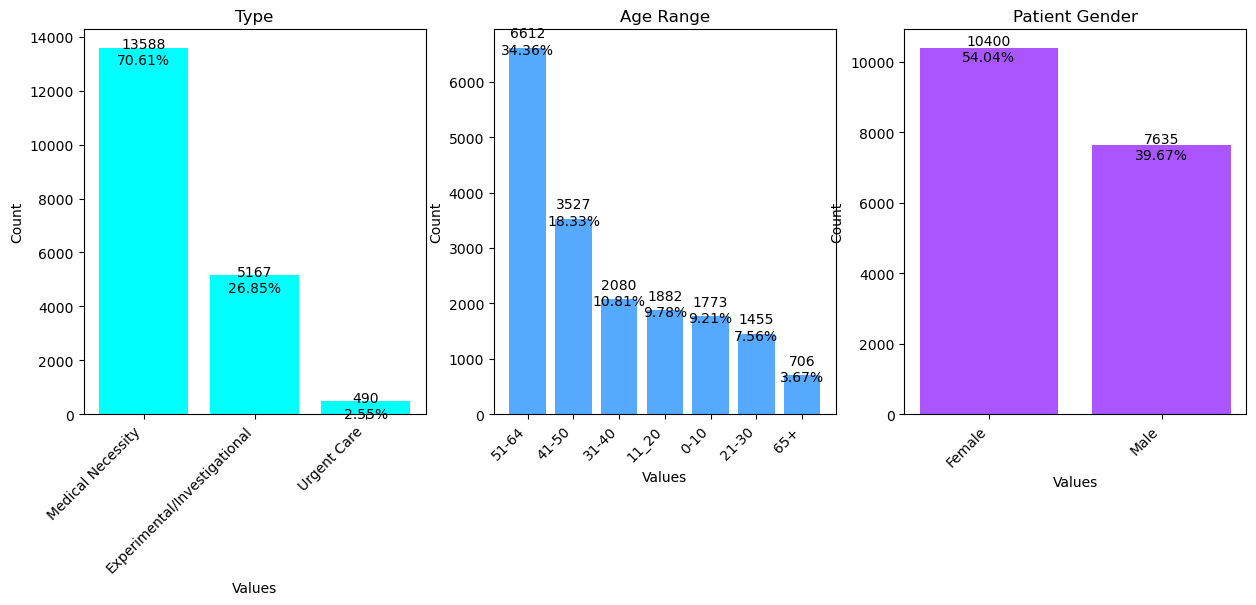

In [16]:
# listing categorical variables columns
cate_columns = ['Type','Age Range','Patient Gender']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cmap = plt.cm.get_cmap('cool')

# looping through each columns

for i, col in enumerate(cate_columns):
    # group the data by column and counting the number of occurances of each value
    counts = df[col].value_counts()
    #total rows
    total_rows = len(df)
    #percentage of each rows
    percent = (counts/total_rows) *100
    #creating bar in corresponding subplot
    axs[i].bar(counts.index,counts.values,color=cmap(i/len(cate_columns)))
    axs[i].set_title(col)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Count')

    #rotate the x axis label
    plt.setp(axs[i].get_xticklabels(),rotation=45,ha='right')

    #adding annotation on each bar
    for j, count in enumerate(counts):
        pc = percent[j]
        axs[i].text(counts.index[j],count + 0.02 * total_rows, f'{count}\n{pc:.2f}%',ha='center', va='top')

#show plot
plt.show()

# Show genderwise distribution

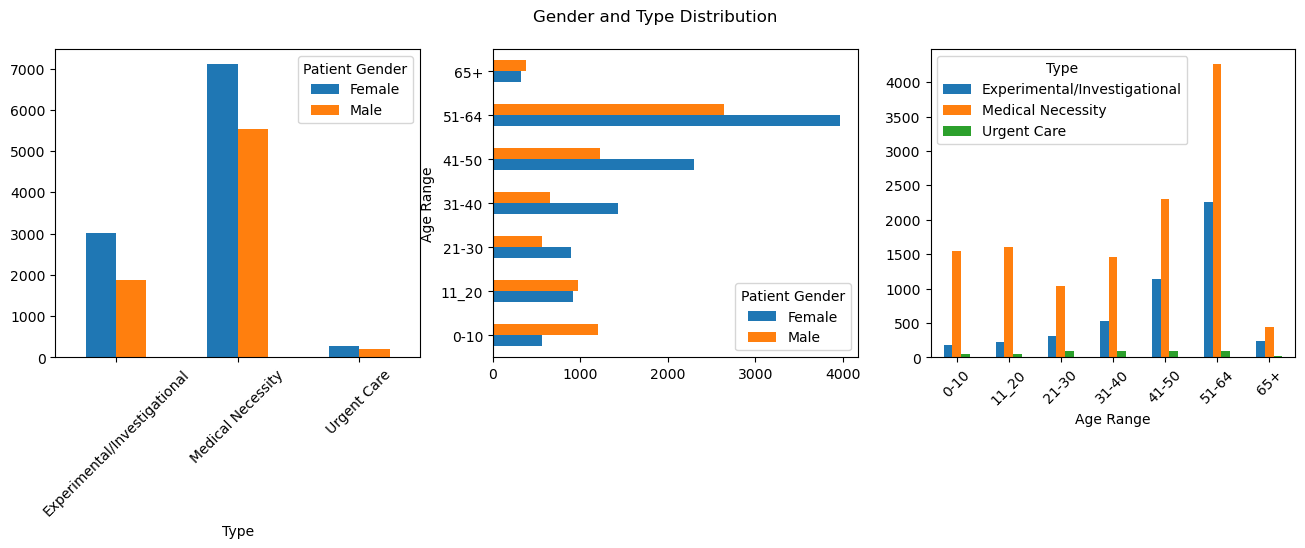

In [57]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,4)

fig.suptitle('Gender and Type Distribution')

d = df.groupby([ 'Type','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0],rot=45,fontsize=10)

d = df.groupby(['Age Range','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='barh', ax=ax[1],fontsize=10)

d = df.groupby(['Age Range','Type',]).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2],rot=45,fontsize=10)